In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#needed to show plots in ipython cells
%matplotlib inline 


In [6]:
APOGEE = fits.open('/Users/spardy/Research/data/APOGEE/allStar-v304.fits')

In [4]:
#APOGEE[1].data uncomment this line to see the data names

In [8]:
vel = APOGEE[1].data['VHELIO_AVG']
v_scatter = APOGEE[1].data['VSCATTER']
v_err = APOGEE[1].data['VERR']

metals = APOGEE[1].data['METALS']
metals_err = APOGEE[1].data['METALS_ERR']

good_points = np.where((metals > -1000) & (metals < 90))[0]
# Looks like we have some strange outliers...
l = APOGEE[1].data['GLON']
b = APOGEE[1].data['GLAT']

ra = APOGEE[1].data['RA']
dec = APOGEE[1].data['DEC']

In [9]:
def plot_coords(RA,Dec,org=0,title='Mollweide projection', projection='mollweide',
                xlabel='RA', ylabel='DEC', **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    From: http://balbuceosastropy.blogspot.com/2013/09/the-mollweide-projection.html
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(Dec), **kwargs)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel(xlabel)
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel(ylabel)
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

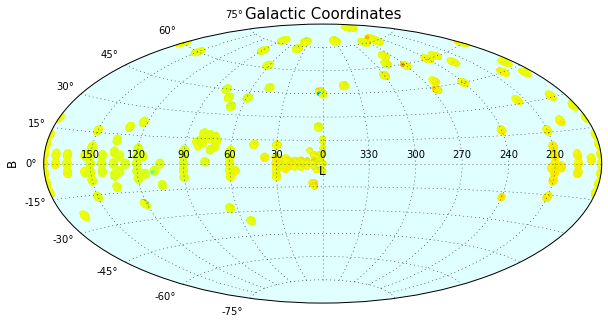

In [14]:
plot_coords(l, b, projection='aitoff', title='Galactic Coordinates', xlabel='L', ylabel='B', c=vel, lw=0)

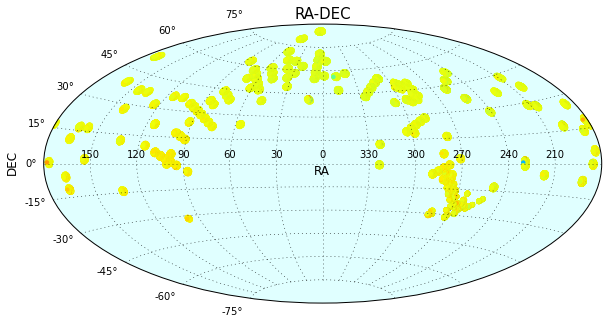

In [16]:
plot_coords(ra, dec, projection='aitoff', title='RA-DEC', xlabel='RA', ylabel='DEC', c=vel, lw=0)

###Now plot these as density

In [18]:
x = np.remainder(l+360,360) # shift RA values
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
x=-x    # reverse the scale: East to the left

hist,xedges,yedges = np.histogram2d(b,x,bins=[100,100],range=[[-90,90],[-180,180]])
X,Y = np.meshgrid(np.radians(yedges),np.radians(xedges))


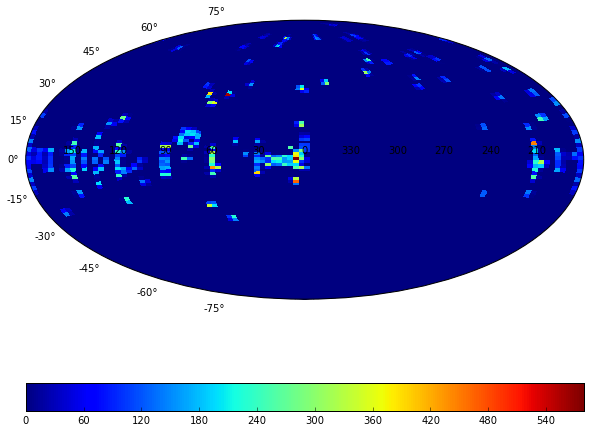

In [19]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360,360)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='aitoff')
axis.grid(True)
# Apparently axis.imshow doesn't work well on 
image = axis.pcolormesh(X,Y,hist)
axis.set_xticklabels(tick_labels)     # we add the scale on the x axis
cb = fig.colorbar(image, orientation='horizontal')


NameError: name 'Vel' is not defined

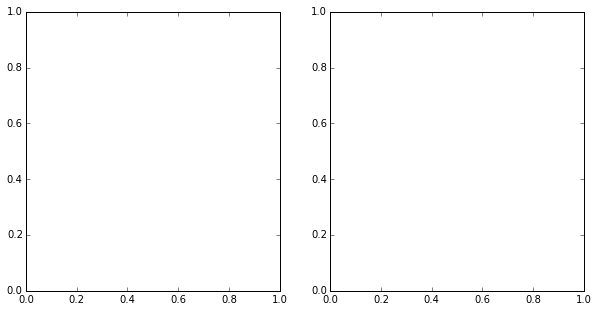

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
axes[0].errorbar(vel[good_points], metals[good_points],
                 xerr=verr[good_points], yerr=metals_err[good_points], color='blue', linestyle='none')